# ASTR 1040 Problem Set 7

The first cell (below) contains lots of helpful constants you may need to use throughout the semester. Make sure to run it each time before you start working! 

For reference, all of the `astropy` constants as well as examples can be found [here](https://docs.astropy.org/en/stable/constants/index.html). Likewise all of the units and their names / how to access them can be found [here](https://docs.astropy.org/en/stable/units/index.html). 

To create a variable with units you need to multiply by the corresponding unit class:

```python
d = 1 * units.au
```

You can then convert unitful quantities to other units by calling the `to` method and passing the desired end unit class: 

```python
d_m = d.to(units.m)
```

If you have a ratio of quanities where all the units should cancel out, you can obtain the dimensionles number using the `dimesionless_unscaled` method. For example writing:
```python
d_m/d
``` 
yields $1.4959787\times 10^{11} \rm{\frac{m}{AU}}$, but doing:
```python
(d_m/d).to(units.dimensionless_unscaled)
```
returns `1.0` as expected.

In [1]:
#SETUP CELL (modify at your own peril)
from astropy import units #access units by doing units.<unit> (i.e. units.au)
from astropy import constants
import numpy as np #common math functions (i.e. np.sin(x)) and better arrays (i.e. np.array([1,2,3])
import matplotlib.pyplot as plt #plotting functions (i.e. plt.plot(x,y))
G = constants.G # gravitational constant
M_sun = constants.M_sun # mass of the sun
R_sun = constants.R_sun # radius of the sun
L_sun = constants.L_sun # luminosity of the sun
M_earth = constants.M_earth # mass of the earth
R_earth = constants.R_earth # radius of the earth
M_jup = constants.M_jup # mass of jupiter
R_jup = constants.R_jup # radius of jupiter
sigma_sb = constants.sigma_sb # Stefan-Boltzmann constant
b_wien = constants.b_wien # Wien's displacement constant
c = constants.c # speed of light
h = constants.h # Planck constant
k_B = constants.k_B # Boltzmann constant
m_e = constants.m_e # mass of electron
m_p = constants.m_p # mass of proton 
m_n = constants.m_n # mass of neutron (basically just the mass of a proton but whatever)
g0 = constants.g0 # standard gravity, 9.8 m/s^2
e = constants.e # absolute value of electron/proton charge

## 1: Milky Way Dynamics [20 points]

In last week's problem set you (should have) found that the mass of the supermassive black hole at the heart of our galaxy is roughly $4\times 10^6 M\odot$, which you found by looking at the orbit of the famous "S2" star. We will now repeat this exercise (in a simpler way) for the entire Milky Way! 

The Large Magellanic Cloud (LMC) is a small dwarf galaxy that orbits the Milky Way. Currently it is at a distance of roughly 160,000 lightyears from the galactic center and moving at a velocity of roughly 300 km/s. 

### a) [10 points] Assuming the orbit is roughly circular, what is the mass enclosed within the LMC's orbit? 


In [5]:
d = 160000 * units.lyr
v = 300 * units.km / units.s

# circular orbit: v = sqrt(G*M / r) => v**2 = G*M / r

m = (d * (v**2) / G).si 
m.to(units.M_sun)

<Quantity 1.02653918e+12 solMass>

### b) [10 points] How does your estimate compare to the estimated mass of the black hole (Sag A*) you found last week? Do you think Sag A* has much of an impact on the orbit of the Sun in the Milky Way? 

My answer suggests the mass enclosed in LMC's orbit is 6 orders of magnitude greater than that of Sag A*. Therefore, I think Sag A* probably doesn't an extreme impact on the orbit of our Sun.

## 2: Galaxy Rotation Curves [60 points]

In this problem we are going to build up a rotation curve for an idealized galaxy, considering both visible matter and dark matter. To do this we'll make several assumptions: 

1. We are going to assume our idealized galaxy is a perfect sphere.
2. We are going to assume most of the idealized galaxy's mass is located within its core, with a constant mass density of $\rho_c = 0.01 \frac{M_\odot}{\rm{ly}^3}$ (about one star every 4.6 cubic light years) in the core (we will neglect the supermassive black hole at the very center and assume its mass gets averaged into this density) and we will assume this core density extends to a radius $r_c = 10^4 \rm{ly}$.
3. We are going to assume that all of the objects in our idealized galaxy are on circular orbits. 

To start we will consider visible matter only:

### a) [10 points] Calculate the rotation speed ($v(r)$) of the galaxy as a function of distance inside the core ($r<r_c$)


In [137]:
ρ_c = 0.01 * units.M_sun / (units.lyr**3) # ρ = M / ((4/3)*np.pi*R**3)
r_c = 10**4 * units.lyr

A = (4/3)*np.pi*(r_c**3)
M_mw = (ρ_c * A).to(units.kg)

def v_rotation(M, r): 
    return (np.sqrt((G * M) / r)).to(units.km / units.s)

v_r = v_rotation(M_mw, r_c).si
v_r.to(units.km / units.s)

<Quantity 242.40288628 km / s>


### b) [10 points] Calculate the rotation speed ($v(r)$) of the galaxy as a function of radial distance outside the core ($r>r_c$)
Note that as stated in assumption 2, we are assuming that there is no mass outside of the core.


In [130]:
v_r_out = v_rotation(0 * units.kg, r_c)
v_r_out.si


<Quantity 0. m / s>


### c) [10 points] Plot $v(r)$ (in units of km/s) versus $r$ (in units of 1000's of ly) for $0.1<r<5\times10^4 \rm{ly}$
Note: if you're doing this in a Jupyter notebook and want to get your extra credit points you'll need to make the plot in your Jupyter notebook, which you should use the [matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html) library to do. This will require slightly more advanced coding than you have done thus far in the semester, so come see Kirk if you need help. 


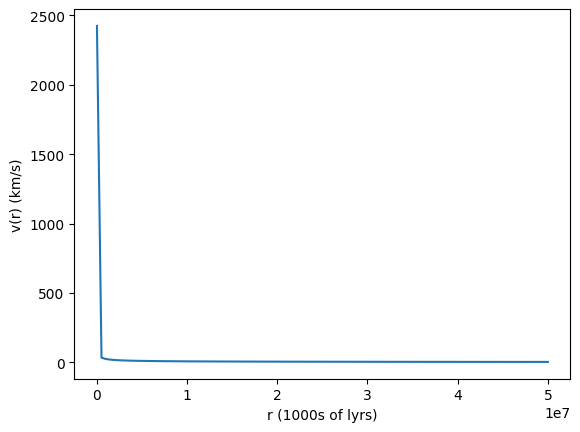

In [145]:
rList = np.linspace(0.1, 5e4, 100)*(1000*units.lyr)
vList = [v_rotation(M_mw, r) for r in rList]
plt.plot([r.value for r in rList], [v.value for v in vList])
plt.xlabel('r (1000s of lyrs)')
plt.ylabel('v(r) (km/s)')
plt.show()



### d) [10 points] Considering visible matter only, where is the fastest rotation speed and what is the corresponding orbital period at this distance?
Provide your answers in km/s and years. 


In [140]:
vList_val = [v.to(units.km/units.s).value for v in vList]
max_v = np.max(vList_val)
# .to(units.km/units.s)
i = np.argmax(vList_val)
rList_val = [r.to(units.lyr).value for r in rList]
r_of_max = rList_val[i]
T = (2*np.pi*r_of_max/ max_v) # lyr / km/s
# .to(units.yr)
print(f"Max v(r): {max_v:.3f}\nCorresponding Orbital Period: {T:.3f}")


Max v(r): 2424.029
Corresponding Orbital Period: 0.259



### e) [10 points] Adding dark matter:

Suppose we added a fourth assumption to our list &mdash; that there was a substantial amount of dark matter in these galaxies. Observationally it is observed that galaxy velocity curves "flatten out" past a certain radius. Let's assume this radius in our case is the core radius $r_c$ &mdash; mathematically, if we want to make $v(r)$ constant we will need to make $M\propto r$. 

Show that the total mass as a function of radius must then be:

$$M(r>r_c) = \frac{4}{3}\pi \rho_c r_c^2r \textrm{ for } r>r_c$$ 

*Hint: What should the difference in velocities between some radius $r$ and the radius of the core $r_c$ be?*


For radii less than $r_c$, we have $$v(r) = \sqrt{\frac{GM(r)}{r}}$$ 
We want to figure out how to make $M \propto r$ such that $v(r)$ is constant.

The difference in velocities $v(r) - v(r_c)$ would have to be $< 0$ for $r > r_c$, since $v(r) \propto \sqrt{\frac{1}{r}}$. 

Originally, we found the mass of the Milky Way by multiplying the constant mass density by the area of a sphere: $\rho _{c} \cdot \frac{4}{3} \pi r_{c}^3$

So, considering the fact that we need $M \propto r$, we can factor out an $r_c$ from this expression. This then leaves us with the expression: $$M(r>r_c) = \frac{4}{3}\pi \rho_c r_c^2r$$


### f) [10 points] Final results:
Remake your plot from part c with your new addition of dark matter to the galaxy's density profile. What value does v(r) flatten out at? Compare the amount of dark matter vs. normal matter required to make this idealized velocity curve out to $10^4 \rm{ly}$ &mdash; what fraction of the total is dark matter and what fraction is normal matter? How does this compare to what you would expect to find in the "real" universe? 

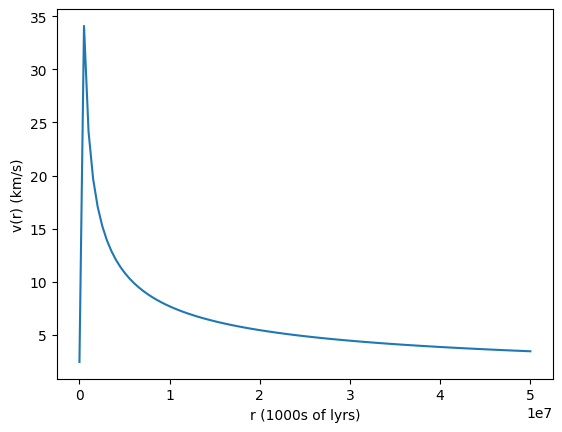

In [147]:
def M(r): 
    return ((4/3) * np.pi * ρ_c * (r**3)) if r <= r_c else ((4/3) * np.pi * ρ_c * (r_c**3))

rList2 = np.linspace(0.1, 5e4, 100)*(1000*units.lyr)
mList = [M(r) for r in rList2]
vList2 = [v_rotation(m, r) for m, r in zip(mList, rList)]
plt.plot([r.value for r in rList2], [v.value for v in vList2])
plt.xlabel('r (1000s of lyrs)')
plt.ylabel('v(r) (km/s)')
plt.show()

For whatever reason, my plots are coming out not as I was expecting (they don't look like the plots we saw in class). But the amount of dark matter is significantly higher than the amount of visible matter. This is comparable to the rest of the universe, where dark matter is much more abundant than visible matter.

## 3: Time dilation snake oil [20 points]

Recently you hurt yourself skiing, and the doctor's told you that you'll probably be out the rest of the season to recover. You're a poor college student though, and you don't want to waste your very expensive ski pass. You heard from a friend that general relativity says that time passes slower for people deeper in gravitational fields, and since ski mountains are at high elevations you plan to just chill out in the lodge for a bit and figure you'll recover faster than if you stayed in the hospital. 

### a) [5 points] Qualitatively, is there any truth behind your friend's claim that you should heal faster on top of the mountain? Why or why not?

### b) [10 points] Say the doctor said it would take 3 months for your injury to heal at the hospital. How much faster/slower will you heal on the mountain?

Let's say the hospital that gave you this healing time estimate is in Boulder (roughly 1.5 km above sea level) and you plan to hang out and heal at the A-basin lodge (almost 4 km above sea level!).

Express your answer as a time difference (i.e. $t_B - t_A$) in units of microseconds.

### c) [5 points] What would you need to change in this problem to make this a more meaningful difference? 